In [26]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
from IPython.display import Image
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
import numpy as np 
import plotly.express as px 
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import chart_studio as py
import plotly.graph_objects as go
import datetime 

plt.style.use('seaborn-darkgrid')

#init_notebook_mode(connected=True) 

# COVID-19 - Dashboard


In [27]:
today = datetime.date.today()
print('Eric Chee ' + str(today))

Eric Chee 2020-04-23


##### UPDATE 2: Markers added  to Confirmed Cases, Recovered and Death Comparison Visualization (2020-04-23)

##### UPDATE 1: Added Geographic Visualization for 'Global - Population Density' for comparison with 'Global - Confirmed Deaths' -  sourced from World Bank Group - https://data.worldbank.org/indicator/sp.pop.totl (2020-04-21)

In [28]:
Image(url= "https://raw.githubusercontent.com/ericchee08/COVID-19-Dashboard/master/coronavirus-banner.png")

## World Health Organisation - Overview on Coronavirus 

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments.

In [29]:
Image(url= "https://raw.githubusercontent.com/ericchee08/COVID-19-Dashboard/master/123.png")

## To prevent infection and to slow transmission of COVID-19, do the following:

- -Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.
- -Maintain at least 1 metre distance between you and people coughing or sneezing.
- -Avoid touching your face.
- -Cover your mouth and nose when coughing or sneezing.
- -Stay home if you feel unwell.
- -Refrain from smoking and other activities that weaken the lungs.
- -Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people

In [30]:
Image(url="https://raw.githubusercontent.com/ericchee08/COVID-19-Dashboard/master/1234.png")

## Symptoms 

The COVID-19 virus affects different people in different ways.  COVID-19 is a respiratory disease and most infected people will develop mild to moderate symptoms and recover without requiring special treatment.  People who have underlying medical conditions and those over 60 years old have a higher risk of developing severe disease and death.

Common symptoms include:

- -fever
- -tiredness
- -dry cough
- -shortness of breath
- -aches and pains
- -sore throat
- -and very few people will report diarrhoea, nausea or a runny nose

People with mild symptoms who are otherwise healthy should self-isolate and contact their medical provider or a COVID-19 information line for advice on testing and referral.

People with fever, cough or difficulty breathing should call their doctor and seek medical attention.

**All information above can be found on the World Health Orginisation Coronavirus Health Topic section.**

In [31]:
Image(url="https://raw.githubusercontent.com/ericchee08/COVID-19-Dashboard/master/12345.png")

In [32]:
death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [33]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [34]:
# recovered_df.head()

In [35]:
# confirmed_df.head()

In [36]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-23 15:31:25,-25.0000,133.0000,6547,67,4124,2356,25.715150,NaN,NaN,1.023369,36,AUS
1,Austria,2020-04-23 15:30:32,47.5162,14.5501,15002,522,11694,2786,166.570439,NaN,NaN,3.479536,40,AUT
2,Canada,2020-04-23 15:31:07,60.0010,-95.0010,41667,2081,14504,25082,110.067963,NaN,NaN,4.994360,124,CAN
3,China,2020-04-23 11:20:12,30.5928,114.3055,83878,4636,77936,1306,5.971340,NaN,NaN,5.527075,156,CHN
4,Denmark,2020-04-23 15:30:32,56.0000,10.0000,8271,394,5573,2304,142.795410,NaN,NaN,4.763632,208,DNK


In [37]:
# data cleaning - making all columns lower case 

country_df.columns = map(str.lower, country_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)

In [38]:
# data cleaning - renaming columns 

confirmed_df = confirmed_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
recovered_df = recovered_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns = {'country_region': 'country','iso3': 'Country', 'mortality_rate': 'mortality rate %','last_update':'updated'})

In [39]:
# data cleaning - sorting the countries from worst case scenarios 
sorted_country_df = country_df.sort_values('confirmed', ascending=False)

In [40]:
# sorted_country_df.head()

# COVID-19 Confirmed Cases, Recovered and Deaths by Country 

In [41]:
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: yellow'
    g = 'background-color: green'
    temp_df = pd.DataFrame('', index=x.index, columns = x.columns)
    temp_df.iloc[:,2] = y
    temp_df.iloc[:,3] = r
    temp_df.iloc[:,4] = g
    return temp_df
    
sorted_country_df.head(20).style.apply(highlight_col, axis=None)

sorted_country_df.head(20)[['updated','country','confirmed','deaths','recovered','active','mortality rate %']].style.apply(highlight_col, axis=None)

,updated,country,confirmed,deaths,recovered,active,mortality rate %
17,2020-04-23 15:31:05,US,843981,46859,77064,720058,5.55214
160,2020-04-23 15:30:32,Spain,213024,22157,89250,101617,10.4012
10,2020-04-23 15:30:32,Italy,187327,25085,54543,107699,13.391
6,2020-04-23 15:30:32,France,157135,21373,41331,94431,13.6017
7,2020-04-23 15:30:32,Germany,151175,5354,103300,42521,3.54159
16,2020-04-23 15:30:32,United Kingdom,139243,18790,701,119752,13.4944
172,2020-04-23 15:30:32,Turkey,98674,2376,16477,79821,2.40793
89,2020-04-23 15:30:32,Iran,87026,5481,64843,16702,6.29812
3,2020-04-23 11:20:12,China,83878,4636,77936,1306,5.52708
13,2020-04-23 15:30:32,Russia,62773,555,4891,57327,0.884138


# Confirmed Cases - 20 Most Impacted Countries 

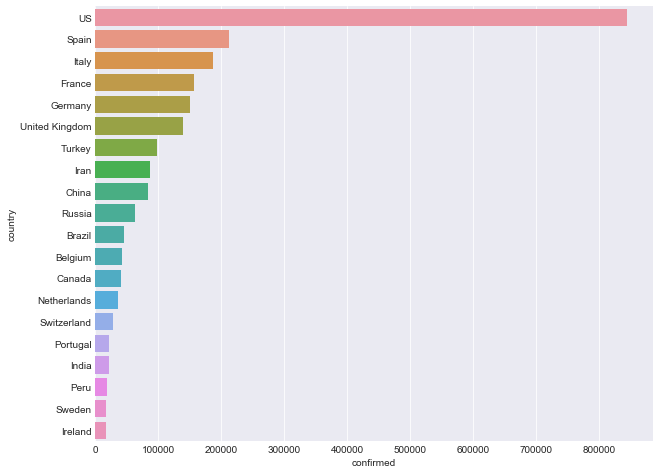

In [42]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "confirmed", y = "country", 
            ax=ax, 
            data=sorted_country_df.head(20))
plt.show()

# Confirmed Cases - 30 Countries 
###### Adjust slider to change number of countries displayed

In [43]:
def bubble_graph(n):    
    
    fig2 = px.scatter(sorted_country_df.head(n), 
                     x='country', 
                     y ='confirmed', 
                     size='confirmed',
                     color='country',
                     size_max=80,
                     )


    fig2.update_layout(xaxis_title="Countries",
                      yaxis_title="Confirmed Cases",
                      margin=dict(l=20, r=20, t=20, b=20))
    return fig2

interact(bubble_graph, n=widgets.IntSlider(min=1, max=30, step=1, value=10));


interactive(children=(IntSlider(value=10, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

# Confirmed Cases, Recovered and Death Comparison

## Enter Country Name: 
##### Case sensitive e.g. United Kingdom, Spain, Italy, etc 

In [44]:
def plot_cases_for_country(country):
    labels = ['confirmed','deaths','recovered']
    colors = ['black', 'red', 'green']

    mode_size = [8]*3
    line_size = [2]*3 # size of both lines

    df_list = [confirmed_df, death_df, recovered_df] # data sets required confirmed and deaths 

    fig = go.Figure()

    for i, df in enumerate(df_list): # enumerate unpacking to unpack labels, colors and df_list 
        if country == 'World' or country == 'world' or country == 'global' or country == 'Global':
            x_data = np.array(list(df.iloc[:, 5:].columns)) # converting columns from index 5 into a numpy array list for x axis (dates)
            y_data = np.sum(np.array(df.iloc[:,5:]),axis=0) # sum all countries from index 5 into numpy array to create y axis 
            
        else:    
            x_data = np.array(list(df.iloc[:, 5:].columns)) # converting columns from index 5 into a numpy array list for x axis (dates)
            y_data = np.sum(np.array(df[df['country'] == country].iloc[:,5:]),axis = 0) # sum a spec. country total to create y axis 
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])))
        
        fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Number of Cases",
        margin=dict(l=20, r=20, t=20, b=20))
            
    fig.show()
        
#plot_cases_for_country('world')
interact(plot_cases_for_country, country='World');

# interact(plot_cases_for_country, country=['World','US','Spain','Italy','France','Germany',
                                            #'China','United Kingdom','Iran','Turkey','Belgium',
                                            #'Switzerland','Netherlands','Canada','Brazil','Portugal',
                                            #'Austria','Russia','Israel','Korea, South','Sweden']);

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

In [45]:
df3 = death_df

In [46]:
US = np.sum(np.array(df3[df3['country']=='US'].iloc[:,5:]),axis = 0)
SP = np.sum(np.array(df3[df3['country']=='Spain'].iloc[:,5:]),axis = 0)
IT = np.sum(np.array(df3[df3['country']=='Italy'].iloc[:,5:]),axis = 0)
FR = np.sum(np.array(df3[df3['country']=='France'].iloc[:,5:]),axis = 0)
GE = np.sum(np.array(df3[df3['country']=='Germany'].iloc[:,5:]),axis = 0)
CH = np.sum(np.array(df3[df3['country']=='China'].iloc[:,5:]),axis = 0)
UK = np.sum(np.array(df3[df3['country']=='United Kingdom'].iloc[:,5:]),axis = 0)
IR = np.sum(np.array(df3[df3['country']=='Iran'].iloc[:,5:]),axis = 0)
TU = np.sum(np.array(df3[df3['country']=='Turkey'].iloc[:,5:]),axis = 0)
BE = np.sum(np.array(df3[df3['country']=='Belgium'].iloc[:,5:]),axis = 0)
SW = np.sum(np.array(df3[df3['country']=='Switzerland'].iloc[:,5:]),axis = 0)
NE = np.sum(np.array(df3[df3['country']=='Netherlands'].iloc[:,5:]),axis = 0)
CA = np.sum(np.array(df3[df3['country']=='Canada'].iloc[:,5:]),axis = 0)
BR = np.sum(np.array(df3[df3['country']=='Brazil'].iloc[:,5:]),axis = 0)
PO = np.sum(np.array(df3[df3['country']=='Portugal'].iloc[:,5:]),axis = 0)
AU = np.sum(np.array(df3[df3['country']=='Austria'].iloc[:,5:]),axis = 0)
RU = np.sum(np.array(df3[df3['country']=='Russia'].iloc[:,5:]),axis = 0)
IS = np.sum(np.array(df3[df3['country']=='Israel'].iloc[:,5:]),axis = 0)
KO = np.sum(np.array(df3[df3['country']=='Korea, South'].iloc[:,5:]),axis = 0)
SW = np.sum(np.array(df3[df3['country']=='Sweden'].iloc[:,5:]),axis = 0)

In [47]:
arr = [US, SP, IT, FR, GE, CH, UK, IR, TU, BE, SW, NE, CA, BR, PO ,AU, RU, IS, KO, SW]

# Confirmed Deaths - 20 Most Impacted Countries 
###### Adjust slider to change number of countries displayed

In [48]:
def global_graph(n):
    
    labels = ['US','Spain','Italy','France','Germany',
            'China','United Kingdom','Iran','Turkey','Belgium',
            'Switzerland','Netherlands','Canada','Brazil','Portugal',
            'Austria','Russia','Israel','Korea, South','Sweden'];
    colors = ['red','orange','green','blue','brown','yellow','purple',
              'maroon','magenta','grey','black','olivedrab','yellowgreen','plum',
              'crimson','orchid','moccasin','aqua','gold','khaki']

    mode_size = [8]*20
    line_size = [2]*20

    x_data = np.array((list(df3.iloc[:, 5:].columns),)*n)

    y_data = arr

    fig3 = go.Figure()

    for i in range(0, n):
        fig3.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
            name=labels[i],
            line=dict(color=colors[i], width=line_size[i]),
            connectgaps=True))

    fig3.update_layout(
            xaxis_title="Date",
            yaxis_title="Number of Cases",
            margin=dict(l=20, r=20, t=20, b=20))
    fig3.show()

interact(global_graph, n=widgets.IntSlider(min=1, max=20, step=1, value=20));

interactive(children=(IntSlider(value=20, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

# Global - Confirmed Deaths 

In [49]:
fig = px.scatter_geo(sorted_country_df, 
                     locations="Country", 
                     color="deaths",
                     hover_name="country", 
                     size="deaths",
                     projection="natural earth",
                     size_max=60,
                     color_continuous_scale='RdBu_R')

fig.update_layout(
        margin=dict(l=20, r=20, t=20, b=20))
fig.show()

# Global - Population Density 
#### Note: Population Density as of 2018, total of approx 7.5 Billion (Approx 300 million less than 2020)


In [50]:
population_df = pd.read_csv("https://raw.githubusercontent.com/ericchee08/COVID-19-DASHBOARD/master/Population%202018.csv")

In [51]:
population_sorted = population_df.sort_values('2018',ascending=False)
population_filtered = population_sorted.drop(population_df.index[[255,100,136,152,99,60,135,245,61,138,226,200, 236, 101,59]])

In [52]:
pop_fig = px.scatter_geo(population_filtered,   
                     locations="Country Code", 
                     color='2018',
                     hover_name="Country Name", 
                     size='2018',
                     projection="natural earth",
                     size_max=60,
                     color_continuous_scale='RdBu_R')

pop_fig.update_layout(
        margin=dict(l=20, r=20, t=20, b=20))
pop_fig.show()

All Data sourced from John Hopkins University COVID-19 Github Repository - https://github.com/CSSEGISandData/COVID-19

Global Population Data sourced from World Bank Group - https://data.worldbank.org/indicator/sp.pop.totl